<h2 style='color:blue' align="center">Decision Tree Classification</h2>

READ DATASET

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


CREATE INDEPENDENT & DEPENDENT VARIABLES

In [4]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [5]:
target = df['salary_more_then_100k']

MODIFY company , job , degree Using Label Encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [7]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [ ]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [8]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [ ]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

RUN CLASSIFIER

In [18]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [5, 6, 7, 8, 9],'criterion' :['gini', 'entropy']  }
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(inputs_n,target)
final_model = grid_search.best_estimator_
final_model


Fitting 5 folds for each of 30 candidates, totalling 150 fits


DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto')

In [11]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

CHECK SCORE

In [ ]:
model.score(inputs_n,target)

1.0

**Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?**

In [ ]:
model.predict([[2,1,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

**Is salary of Google, Computer Engineer, Masters degree > 100 k ?**

DISPLAY TREE

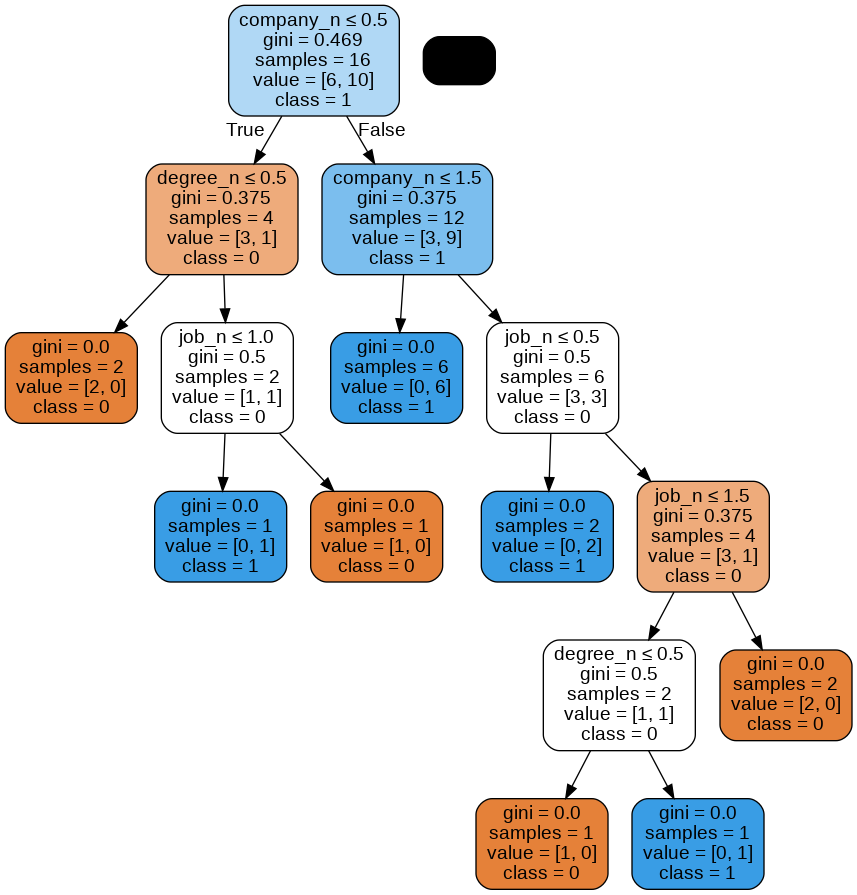

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['company_n',	'job_n',	'degree_n'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('salaries.png')
Image(graph.create_png())